In [1]:
__author__ = 'Mike Fitzpatrick <mike.fitzpatrick@noirlab.edu>, Glenn Eychaner, Robert Nikutta <robert.nikutta@noirlab.edu>'
__version__ = '20211122'
__datasets__ = ['sdss_dr14']

# How to Use the Data Lab Public File Services

_Mike Fitzpatrick, Glenn Eychaner, Robert Nikutta_

Files in the virtual storage are usually identified via the prefix "_vos://_". This shorthand identifier is resolved to a user's home directory of the storage space in the service.  

If the "_vos://_" prefix is instead the name of another user (e.g. "_demo01://_", and the remainder of the path grants public or group read/write access, then the other user's spaces will be accessed. Most user spaces have a "_/public_" directory to facilitate file sharing (e.g. '_demo01://public/foo.fits_' will access the '_foo.fits_' file from user '_demo01_'). Users can make any file (or directory) public by moving it to (or creating a link in) their "/public" directory.

_Public file services_ are specially created areas where all files are world-readable, and are used for serving files from Data Lab datasets.

In [2]:
# Make matplotlib plot inline
%matplotlib inline

# Standard DL imports, note we only need storeClient
from dl import storeClient as sc

# 3rd Party Imports
import io
import numpy as np
from matplotlib import pyplot as p
from astropy.io import fits

### Listing another user's 'public/' folder in their vospace
The user in our example is 'demo00'

In [3]:
print(sc.ls ('demo00://public', format='short'))

test2.csv       test3.csv       test6.csv        



### An example using the **SDSS DR14** public file service.
A 'file service' is a _public_ vospace, readable by all users.

### Set base directory and plate number

In [4]:
# Set the base directory and plate number
# These can be found by explring the SDSS DR14 space using 'sc.ls()'
print(sc.ls ('sdss_dr14://'))
print(sc.ls ('sdss_dr14://eboss'))
print(sc.ls ('sdss_dr14://eboss/spectro'))
print(sc.ls ('sdss_dr14://eboss/spectro/redux'))
base = 'sdss_dr14://eboss/spectro/redux/v5_10_0/'
plate = '3615'

apo,apogee,eboss,env,manga,marvels,sdss
calib,elg,lss,lya,photo,photoObj,qso,resolve,spectro,spiders,sweeps,target
data,firefly,redux
images,platelist-mjdsort.html,platelist-mjdsort.txt,platelist.fits,platelist.html,platelist.txt,platequality-mjdsort.html,platequality-mjdsort.txt,platequality.html,platequality.txt,redmonster,v5_10_0


### List all available FITS plate files in the plate directory

In [5]:
# Construct the vospace path to the plate directory
spPlate = base + plate + '/spPlate-' + plate
print(sc.ls (spPlate + '*.fits', format='short'))

spPlate-3615-55179.fits  spPlate-3615-55208.fits  spPlate-3615-55445.fits
spPlate-3615-55856.fits  spPlate-3615-56219.fits  spPlate-3615-56544.fits



### Pick a modified Julian date and fiber

In [6]:
mjd = '56544'
fiber = 39

# Construct the vospace path to the plate file and verify
spfile = spPlate + '-' + mjd + '.fits'
print ('File: ' + spfile)
print (sc.ls (spfile))

File: sdss_dr14://eboss/spectro/redux/v5_10_0/3615/spPlate-3615-56544.fits
spPlate-3615-56544.fits


### Now read the spectrum from the file and construct the wavelength array

In [7]:
try:
    with fits.open(sc.get(spfile, mode='fileobj')) as hdulist:
        hdr = hdulist[0].header
        flux = hdulist[0].data[fiber-1, :]
        ivar = hdulist[1].data[fiber-1, :]
        sky = hdulist[6].data[fiber-1, :]
except Exception as e:
    raise ValueError("Could not find spPlate file for plate={0:s}, mjd={1:s}!".format(plate, mjd))

loglam = hdr['COEFF0'] + hdr['COEFF1']*np.arange(hdr['NAXIS1'], dtype=flux.dtype)
wavelength = 10.0**loglam
print ("{} {} {}".format(len(flux),len(ivar),len(wavelength)))

4645 4645 4645


### Make a plot of the spectrum

Text(0, 0.5, 'Flux')

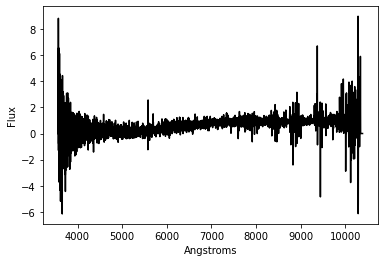

In [8]:
p.plot(wavelength, flux * (ivar > 0), 'k')
p.xlabel('Angstroms')
p.ylabel('Flux')

### List all available public file spaces

The '_sc.services()_' function allows a user to list all the available file services.

In [9]:
print(sc.services())


                    name   svc   description
                --------   ----  --------
                     nfp   vos   NOAO Fundamental Plane Survey
                 chandra   vos   ChaMPlane: Measuring the Faint X-ray Bin ...
             cosmic_dawn   vos   Cosmic DAWN survey
               deeprange   vos   Deeprange Survey
           deep_ecliptic   vos   Deep Ecliptic Survey
                 des_dr2   vos   Dark Energy Survey DR2
                desi_ets   vos   DESI Early Target Selection
                     dls   vos   Deep Lens Survey
                  flamex   vos   FLAMINGOS Extragalactic Survey
                     fls   vos   First Look Survey
                    fsvs   vos   Faint Sky Variability Survey
               ir_bootes   vos   Infrared Bootes Imaging Survey
                     lgs   vos   Local Group Survey
             gogreen_dr1   vos   GOGREEN DR1 Survey
                     lmc   vos   SuperMACHO Survey
                  ls_dr1   vos   DECam Legacy Survey